# Ground_Truth_Encoding

**脚本介绍**:

    该文件主要是实现 GroundTruth 进行 Encoding 得到 Label 目标图像
    
    共22类：
        - 将void类别转为 label 255
        - 其他从 0 开始进行编码

## import module

In [13]:
import os.path
from tqdm import tqdm
import numpy as np
from PIL import Image
import glob
import cv2
import matplotlib.pyplot as plt

## GroundTruth文件夹

In [14]:
gt_dir = 'Dataset/msrc2_seg/gt'
gt_path = glob.glob1(gt_dir,'*.bmp')

## Test

In [15]:
# print(gt_path)
# img = cv2.imread(os.path.join(gt_dir,gt_path[0]))
# print(gt_path[0])
# img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# plt.imshow(img)
# plt.show()

## Color_Map对应的22种类别

In [16]:
color_map=[[0, 0, 0],[128, 0, 0],[0, 128, 0],[128, 128, 0],
[0, 0, 128],[0, 128, 128],[128, 128, 128],[192, 0, 0],
[64, 128, 0],[192, 128, 0],[64, 0, 128],[192, 0, 128],
[64, 128, 128],[192, 128, 128],[0, 64, 0],[128, 64, 0],
[0, 192, 0],[128, 64, 128],[0, 192, 128],[128, 192, 128],
[64, 64, 0],[192, 64, 0]]

## GroundTruth_Label

In [17]:
gt_label_dir = 'Dataset/msrc2_seg/gt_label'

In [12]:
if not os.path.exists(gt_label_dir):
    os.makedirs(gt_label_dir)

In [20]:
def encoding():
    '''
    Tips:
        22个类别：
            - 对于 void(color = [0,0,0])转为 255
            
            - 其余对应color_map中从 0 开始编码
    
    '''
    for i,gt_img in enumerate(tqdm(gt_path)):
        img = cv2.imread(os.path.join(gt_dir,gt_img))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h,w = img.shape[:-1]
        mask = np.zeros((h,w),dtype=np.uint8)

        for j,color in enumerate(color_map):
            mask_rgb = (img==color)
            mask = mask + (mask_rgb[:,:,0]*mask_rgb[:,:,1]*mask_rgb[:,:,2])*j
            
    '''
        这里本来是打算加强背景和其他元素的区分度来增大label标签的，不适合设计Loss
    '''           
#             if j == 0:# 对于void直接赋值为255
#                 mask = mask + (mask_rgb[:,:,0]*mask_rgb[:,:,1]*mask_rgb[:,:,2])*0
#             else:# 其他的从 0 开始编码
#                 mask = mask + (mask_rgb[:,:,0]*mask_rgb[:,:,1]*mask_rgb[:,:,2])*j
    
    '''
        for show
    '''
        # fig,ax = plt.subplots(1,2,dpi=200)
        # ax[0].imshow(img)
        # ax[1].imshow(mask)
        # plt.show()
        # print(mask.shape)
        # break
        
        cv2.imwrite(os.path.join(gt_label_dir,gt_path[i]),mask)

In [19]:
# encoding()

## Check The Encoding if Successful

13_10_s_GT.bmp
(213, 320)


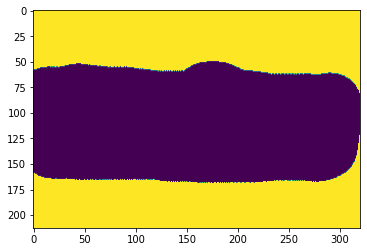

In [23]:
index = np.random.randint(500)
img2 = cv2.imread(os.path.join(gt_label_dir,gt_path[index]),cv2.IMREAD_GRAYSCALE)

print(gt_path[index])
print(img2.shape)

plt.imshow(img2)
plt.show()